<a href="https://colab.research.google.com/github/ShujoyI/CECS-451-Assignment10/blob/main/mcmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Consider Figure 1, and implement a program to answer the query P(C|¬s, w) by using MCMC sampling. The program should generate 1, 000, 000 samples to estimate the probability. To answer (a) and (b), you can prepare the answers with scratch paper and print-out them. However, you have to implement a simulation program to answer (c).

(a) (8 points) Show P~ (C|¬s, r), P~ (C|¬s, ¬r), P~ (R|c, ¬s, w), P~ (R|¬c, ¬s, w).

(b) (16 points) Show the transition probability matrix Q ∈ R
4×4 where
qij = transition probability from Si to Sj
in Figure 2.

(c) (20 points) Show the probability of the query P~ (C|¬s, w)

(d) Please follow the output format. (Fix precisions using "0:.nf".format)

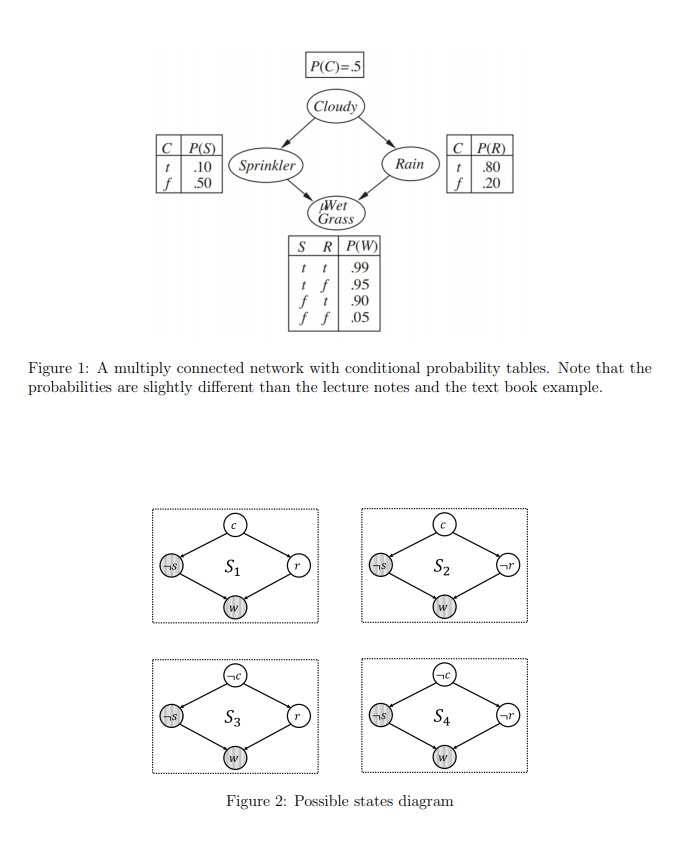

In [35]:
import random

# Function to print the transition probability matrix
def print_matrix(matrix):

  header = "{0:12} ".format("")
  # Print the column headers of the matrix 
  for i in range(1,5):
    header = header + "{0:12} ".format("S" + str(i))
  print(header)

  # Print each row, starting the the header for the row
  for idx, i in enumerate(matrix):
    row = "{0:10} ".format("S" + str(idx + 1))

    for transition in i:
      if transition == 0:
        row = row + "  "

      row = row + "{0:12} ".format(str(transition))
      
      if transition == 0:
        row = row[:len(row) - 2]

    print(row + "\n\n")


# Generate 1,000,000 samples
N = 1000000

# Show probability of < P(c|¬s, w), P(¬c|¬s, w) >

# Initialize state [C, S, R, W] -> C = 0, and W = 1 constant 
# state vector is [S, R]
state = (1, 1)

# dict of output history
table = {(1, 1): 0, (1, 0): 0, (0, 1): 0, (0, 0): 0}

# Maps state variables to a state number for use in transition table
stateNumber = {(1, 1): 0, (1, 0): 1, (0, 1): 2, (0, 0): 3}
states = [(1, 1), (1, 0), (0, 1), (0, 0)]

transitions =[[0.932, 0.007, 0.061, 0], 
[0.493, 0.162, 0, 0.345], 
[0.439, 0, 0.47, 0.091], 
[0, 0.155, 0.409, 0.436]]

# A list of lists, with the cumulative probabilities of transitioning
cumTransitions = []
for ls in transitions:
  track = 0
  temp = []
  for i, val in enumerate(ls):
    if i == 0:
      temp.append(val)
    else:
      temp.append(val + temp[i - 1])
    
    # Makes sure to pass the cumulative prob down the chain, 
    # but returns the 0 prob transition back to 0 after calculation 
    if val == 0:
      track = i
  
  # Makes cumulative probability of selecting the 0 probability transition 0
  temp[track] = 0
  cumTransitions.append(temp)

# 1 million iterations
for i in range(N):
  # randomly choose a transition probability
  prob = random.random()

  # State number for current state
  number = stateNumber[state]

  # Figures out which state to transition to next
  for i, val in enumerate(cumTransitions[number]):
    if prob < val:
      state = states[i]
      table[state] += 1
      break
  
print("Part A. The sampling probabilities")
print ("P(C|-s, r) = < 0.8780, 0.1220 >")
print ("P(C|-s, -r) = < 0.3103, 0.6897 >")
print ("P(R|c, -s, w) = < 0.9863, 0.0137 >")
print ("P(R|-c, -s, w) = < 0.8182, 0.1818 >\n")

print("Part B. The transition probability matrix")
print_matrix(transitions)

print("Part C. The probability for the query")
posCprob = (table[(1,1)] + table[(1,0)]) / N
negCprob = (table[(0,1)] + table[(0,0)]) / N

posString = "{0:.4f}".format(posCprob)
negString = "{0:.4f}".format(negCprob)

print ("P(C|-s, w) = < ", posString, ", ", negString," >", sep="")  


Part A. The sampling probabilities
P(C|-s, r) = < 0.8780, 0.1220 >
P(C|-s, -r) = < 0.3103, 0.6897 >
P(R|c, -s, w) = < 0.9863, 0.0137 >
P(R|-c, -s, w) = < 0.8182, 0.1818 >

Part B. The transition probability matrix
             S1           S2           S3           S4           
S1         0.932        0.007        0.061          0          


S2         0.493        0.162          0          0.345        


S3         0.439          0          0.47         0.091        


S4           0          0.155        0.409        0.436        


Part C. The probability for the query
P(C|-s, w) = < 0.8558, 0.1442 >
